In [6]:
import numpy as np
from keras.models import  Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import LSTM
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [7]:
df=pd.read_csv("D:\\360Downloads\\WeChat Files\\zhaojinghan111\\FileStorage\\File\\2024-04\\AAPL.csv",parse_dates=["Date"],index_col=[0])
# 读取文件，并转换为dateframe对象，将date列解析为日期格式；并将第一列设为索引

In [8]:
print(df.index.freq)
#索引频率（每日/月/年）；除非在创建dataframe 时明确设定，
#否则通常返回 none

None


In [9]:
df = df.iloc[:, :-1]

In [10]:
# 表示有5203行， 5 列
print(df.shape)

(2517, 5)


In [11]:
#返回前五行；df.head(10)
df.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2014-03-27,19.286428,19.339287,19.111429,19.195000,16.907249
2014-03-28,19.225714,19.247856,19.080357,19.173571,16.888372
2014-03-31,19.258215,19.314644,19.140356,19.169287,16.884605
2014-04-01,19.205713,19.352501,19.170357,19.344643,17.039061
2014-04-02,19.370714,19.410000,19.295000,19.376785,17.067366


In [12]:
df.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998
2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007


In [13]:
test_split=round(len(df)*0.20)
# 先通过len（df）确定dataframe的长度，即行数；乘以0.2得到20%的数据行数；
#round 四舍五入； 将数据分割成训练集和测试集，其中测试占20%；这里注意不能打乱数据顺序，时间序列必须是顺序的

In [14]:
test_split

503

In [15]:
df_for_training=df[:-503]
df_for_testing=df[-503:]
#创建2个新的df：从开始到倒数第1041行；最后1041行

In [16]:
print(df_for_training.shape)
print(df_for_testing.shape)

(2014, 5)
(503, 5)


In [17]:
dim_names = ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']

# 数据归一化
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[dim_names])
df_scaled = pd.DataFrame(df_scaled, columns=dim_names, index=df.index)

# 创建归一化数据的子图，设置相同的y轴尺度
plt.figure(figsize=(15, 10))  # 调整图形尺寸以获得更好的可读性
for i, dim in enumerate(dim_names):
    plt.subplot(3, 3, i+1)
    plt.plot(df_scaled.index, df_scaled[dim], label=dim)
    plt.ylim(0, 1)  # 设置y轴的范围
    plt.title(dim)
    plt.legend()

plt.tight_layout()  # 调整布局以防止重叠
plt.show()  # 显示图表

KeyError: "['Volume'] not in index"

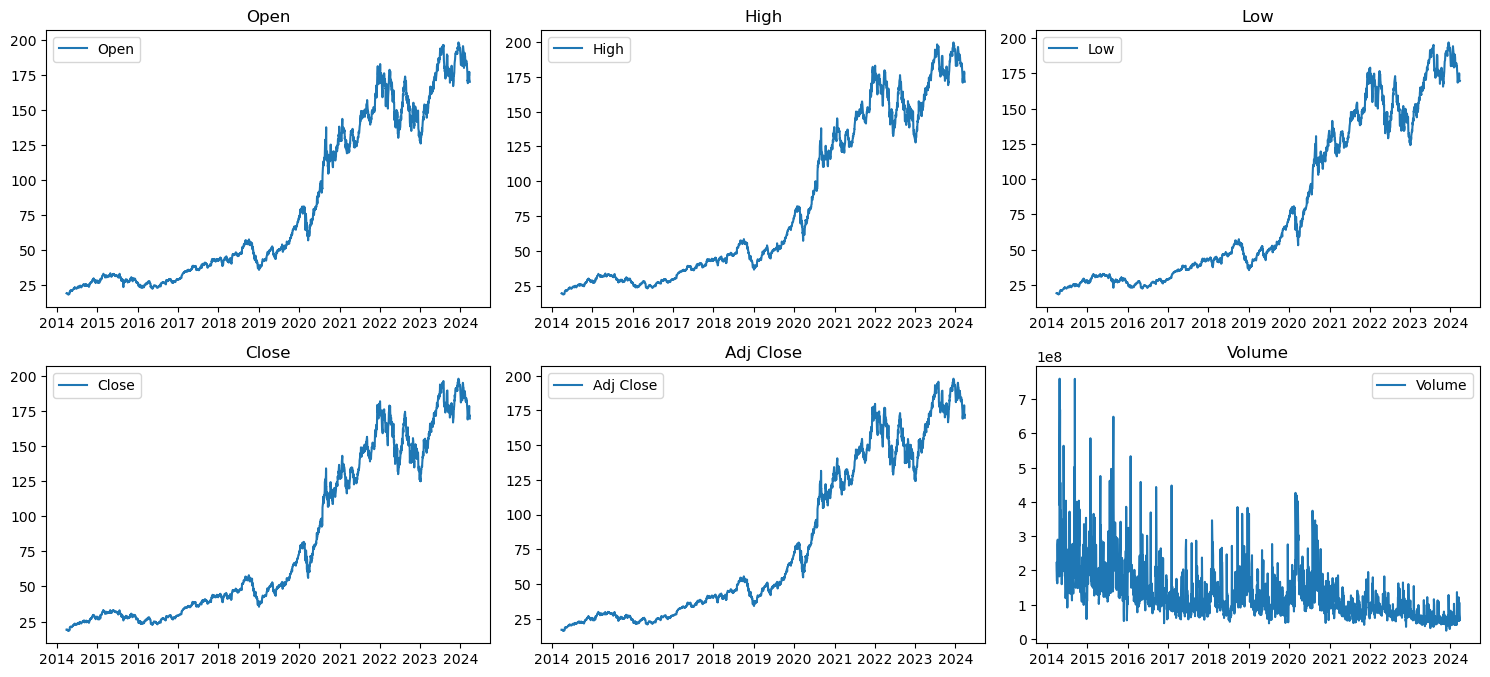

In [6]:
dim_names = ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']

# 数据归一化


# 创建归一化数据的子图，设置相同的y轴尺度
plt.figure(figsize=(15, 10))  # 调整图形尺寸以获得更好的可读性
for i, dim in enumerate(dim_names):
    plt.subplot(3, 3, i+1)
    plt.plot(df.index, df[dim], label=dim)
    #plt.ylim(0, 1)  # 设置y轴的范围
    plt.title(dim)
    plt.legend()

plt.tight_layout()  # 调整布局以防止重叠
plt.show()  # 显示图表

D:\anacoda\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


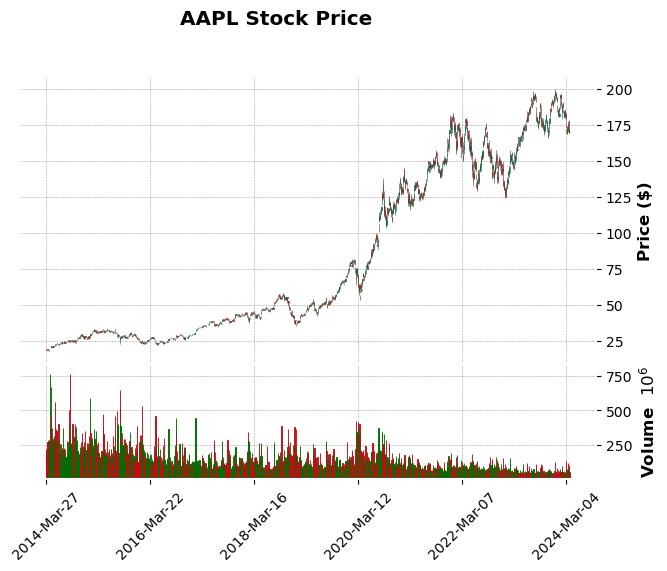

In [17]:
import pandas as pd
import mplfinance as mpf

# 使用之前提供的文件路径加载数据
file_path = "C:\\Users\\13272\\Downloads\\AAPL.csv"

# 加载数据，设置日期为索引
df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

# 确保数据是按日期排序的
df.sort_index(inplace=True)

# 由于mplfinance需要特定的列名，我们确保列名正确
df.rename(columns={
    "Open": "Open",
    "High": "High",
    "Low": "Low",
    "Close": "Close",
    "Adj Close": "Adj Close",
    #"Volume": "Volume"
}, inplace=True)

# 使用mplfinance绘制K线图，包含成交量
mpf.plot(df, type='candle', style='charles',
         title='AAPL Stock Price',
         ylabel='Price ($)',
         volume=True)


In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
# minmaxscaler是特征缩放技术，将最小特征值转换为0，最大特征值转换为1，其他数据线性缩放
# fit部分计算df_for_training 的最大/小值。缩放后的数据被储存在df_for_training_scaled 中；
# 特征缩放的目的是为了处理在数量级或单位上有很大差异的特征，通过确保各项特征都在相同维度上，可以帮助算法更好的学习模型

In [19]:
df_for_training_scaled

array([[0.00478067, 0.00443578, 0.00528194, 0.00425921, 0.00375339],
       [0.00441075, 0.00387939, 0.00508877, 0.00412815, 0.00363789],
       [0.00460877, 0.00428582, 0.00546177, 0.00410195, 0.00361484],
       ...,
       [0.89569125, 0.91772632, 0.91166139, 0.91933293, 0.92160604],
       [0.91080145, 0.93732109, 0.92869496, 0.92783386, 0.93001501],
       [0.92950629, 0.94644908, 0.94460968, 0.95144078, 0.95336674]])

In [20]:
df_for_training_scaled.shape


(2014, 5)

In [21]:
df_for_testing_scaled.shape

(503, 5)

In [22]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0]) # 目标是 open
    return np.array(dataX),np.array(dataY)
#首先定义两个空白列表，dataset 表示你要处理的数据；n_past 表示 想要查看多少个过去的观测值来预测未来值
#for 循环遍历了dataset中从n_past开始的每一行；将从 i-n_past 到 i（不包括i）的数据添加到dataX中。；
#在dataY中添加在时间步i处的观测值（即想要的预测值）
#总结: 创建一个数据结构，用n_past时间步的数据 预测下一个时间步的数据

In [23]:
trainX,trainY=createXY(df_for_training_scaled,50)
# 在trainX中我们会有所有的特征值，而在trainY中我们只有目标值。

In [24]:
trainX.shape

(1964, 50, 5)

In [25]:
testX,testY=createXY(df_for_testing_scaled,50)

In [26]:
trainX[0]

array([[0.00478067, 0.00443578, 0.00528194, 0.00425921, 0.00375339],
       [0.00441075, 0.00387939, 0.00508877, 0.00412815, 0.00363789],
       [0.00460877, 0.00428582, 0.00546177, 0.00410195, 0.00361484],
       [0.00428889, 0.00451619, 0.00564827, 0.00517439, 0.00455993],
       [0.00529421, 0.00486609, 0.00642314, 0.00537096, 0.00473312],
       [0.00507879, 0.0046531 , 0.00584144, 0.00454971, 0.0040094 ],
       [0.00473498, 0.00410976, 0.00427395, 0.00302731, 0.00266779],
       [0.00216947, 0.00213204, 0.00234457, 0.00120349, 0.00106053],
       [0.00155367, 0.00109319, 0.00163631, 0.00119695, 0.0010548 ],
       [0.00099879, 0.00204294, 0.00237343, 0.00269969, 0.00237912],
       [0.00274828, 0.00242327, 0.00262876, 0.00120569, 0.00106249],
       [0.00020672, 0.00037817, 0.00128996, 0.0003604 , 0.00031758],
       [0.00083777, 0.00023254, 0.0013055 , 0.00081254, 0.00071601],
       [0.00048308, 0.00011953, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.

In [27]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (1964, 50, 5)
trainY Shape--  (1964,)


In [28]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (453, 50, 5)
testY Shape--  (453,)


In [29]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.00478067 0.00443578 0.00528194 0.00425921 0.00375339]
 [0.00441075 0.00387939 0.00508877 0.00412815 0.00363789]
 [0.00460877 0.00428582 0.00546177 0.00410195 0.00361484]
 [0.00428889 0.00451619 0.00564827 0.00517439 0.00455993]
 [0.00529421 0.00486609 0.00642314 0.00537096 0.00473312]
 [0.00507879 0.0046531  0.00584144 0.00454971 0.0040094 ]
 [0.00473498 0.00410976 0.00427395 0.00302731 0.00266779]
 [0.00216947 0.00213204 0.00234457 0.00120349 0.00106053]
 [0.00155367 0.00109319 0.00163631 0.00119695 0.0010548 ]
 [0.00099879 0.00204294 0.00237343 0.00269969 0.00237912]
 [0.00274828 0.00242327 0.00262876 0.00120569 0.00106249]
 [0.00020672 0.00037817 0.00128996 0.0003604  0.00031758]
 [0.00083777 0.00023254 0.0013055  0.00081254 0.00071601]
 [0.00048308 0.00011953 0.         0.         0.        ]
 [0.         0.         0.00062388 0.00022935 0.00020211]
 [0.00042432 0.00144962 0.00174732 0.00152457 0.00134349]
 [0.0015863  0.00240153 0.00280415 0.00288535 0.00254266]


In [30]:
print("trainX[1]-- \n",trainX[1])

trainX[1]-- 
 [[0.00441075 0.00387939 0.00508877 0.00412815 0.00363789]
 [0.00460877 0.00428582 0.00546177 0.00410195 0.00361484]
 [0.00428889 0.00451619 0.00564827 0.00517439 0.00455993]
 [0.00529421 0.00486609 0.00642314 0.00537096 0.00473312]
 [0.00507879 0.0046531  0.00584144 0.00454971 0.0040094 ]
 [0.00473498 0.00410976 0.00427395 0.00302731 0.00266779]
 [0.00216947 0.00213204 0.00234457 0.00120349 0.00106053]
 [0.00155367 0.00109319 0.00163631 0.00119695 0.0010548 ]
 [0.00099879 0.00204294 0.00237343 0.00269969 0.00237912]
 [0.00274828 0.00242327 0.00262876 0.00120569 0.00106249]
 [0.00020672 0.00037817 0.00128996 0.0003604  0.00031758]
 [0.00083777 0.00023254 0.0013055  0.00081254 0.00071601]
 [0.00048308 0.00011953 0.         0.         0.        ]
 [0.         0.         0.00062388 0.00022935 0.00020211]
 [0.00042432 0.00144962 0.00174732 0.00152457 0.00134349]
 [0.0015863  0.00240153 0.00280415 0.00288535 0.00254266]
 [0.00223258 0.00233416 0.0033681  0.00300111 0.00264472]


In [31]:
trainY[0]

0.02847294633427451

In [32]:
trainY.shape

(1964,)

In [33]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# gridsearch cv 用于参数调优，通过交叉验证评估每一种参数组合的性能，然后选择性能最好的那一组参数。这样可以帮助你寻找模型的最优参数

In [34]:
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import MeanSquaredError

In [35]:
def add_ema(df, span=50):
    ema = df['Close'].ewm(span=span, adjust=False).mean()
    df['EMA'] = ema
    return df

In [190]:
#使用 girdsearchCV 进行一些超参数调整以找到基础模型
#sequential 模型是最简单的一种模型，由多个网络层堆叠；可以简单地通过.add()方法一层一层往模型里添加网络层。
#输入的数据经过两个LSTM层的处理，再通过Dropout层和Dense层的转换，得到最终的预测结果。
#第一个 LSTM层，有50个单元（单元数量过多会导致过度拟合），return_sequences=True表示返回的是全部输出序列，而不只是最后一个输出。
#再添加一个拥有50个单元的LSTM层。这个层返回最后一个输出。
#Dropout层，这个层在训练过程中每次更新参数时随机断开一定比例（这里是百分之二十）的输入神经元，用以防止过拟合
#添加一个全连接层（Dense layer），拥有1个神经元。
#损失函数为'mse'即均方误差，优化器为传入的参数optimizer。
def build_model(optimizer, dropout_rate=0.2, pool_size_1=2):
    grid_model = Sequential()
    grid_model.add(LSTM(50, return_sequences=True, input_shape=(50,5)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(dropout_rate)) 
    grid_model.add(Dense(1))
    #输出预测的股票价格。
    grid_model.compile(loss = 'mse',optimizer = optimizer,metrics=['mae'])
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
#创建一个Keras回归器。其中，build_fn=build_model指定了用来构建Keras模型的函数，verbose=1表示在模型训练时打印详细的信息，
#validation_data=(testX,testY)设置了验证数据集，用于在模型训练过程中评估模型的性能。
batch_sizes = [16, 32]  # Larger batch sizes for more stable gradient estimates
epochs = [100,50, 25]  # More epochs for thorough learning
optimizers = ['Adam',]  
dropout_rates = [0.2,0.4]  # Additional dropout rate to test

parameters = {
    'batch_size': batch_sizes,
    'epochs': epochs,
    'optimizer': optimizers,
    'dropout_rate': dropout_rates
}
# 这段代码定义了一个字典，字典中包含了你想要网格搜索来优化的模型参数。这里你选择了批处理大小（batch_size）、
# 训练轮数（epochs）和优化器（optimizer）进行优化。

early_stop = EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 3,
                            scoring='neg_mean_squared_error')

#交叉验证：数据样本切割成较小子集；每一次交叉验证，我们会选择其中一组作为测试集，剩下的k-1组作为训练集来训练模型。这个过程会重复k次，使得每一组数据都有一次机会作为测试集，其余次数作为训练集。

C:\Windows\Temp\ipykernel_148172\2045221072.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [191]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2

In [192]:
#在这个代码中，parameters 是一个字典，用于定义网格搜索中需要尝试的参数和对应的值范围。

#'batch_size' : [16,20]：

#batch_size 参数表示每次模型在训练过程中使用的数据样本数量。例如，如果你有1000个样本，batch_size设置为16，那么模型将会在每次迭代时使用16个样本进行训练，一共需要63次迭代才能完成一轮训练（即一个epoch）。
#batch_size 的设定可以影响模型的训练效率和效果。太大的 batch_size 可能会导致模型需要更多的内存，并可能导致模型训练过程中陷入局部最优解；而太小的 batch_size 则可能会导致模型训练时间过长，且模型的收敛速度和效果可能会受到影响。
#在这段代码中，'batch_size' : [16,20] 表示在网格搜索中，尝试 batch_size 为16和20两种情况。
#'epochs' : [8,10]：

#epochs 参数表示模型在训练过程中数据集的完整遍历次数。例如，如果你设定 epochs 为10，那么模型就会完整地使用数据集进行10次训练。
#epochs 的设定可以影响模型的训练效果。太小的 epochs 可能会导致模型未能完全学习数据中的信息；而太大的 epochs 则可能会导致模型过拟合，也就是模型过度学习了训练数据的特点，导致在新的、未见过的数据上表现不佳。
#在这段代码中，'epochs' : [8,10] 表示在网格搜索中，尝试 epochs 为8和10两种情况。
#'optimizer' : ['adam','Adadelta']：

#如果你想为你的模型做更多的超参数调整，也可以添加更多的层。 但是如果数据集非常大建议增加 LSTM 模型中的时期和单位。
#optimizer 参数表示模型在训练过程中用于更新权重和偏差的优化算法。
#adam 和 Adadelta都是常见的优化算法，它们有不同的计算方式和特点，对模型的训练速度和效果都有影响。
#在这段代码中，'optimizer' : ['adam','Adadelta'] 表示在网格搜索中，尝试 optimizer 使用 adam 和 Adadelta 两种优化算法。

In [193]:
grid_search.fit(trainX, trainY, callbacks=[early_stop])
# Loss"指的是损失函数（Loss function），也被称为代价函数（Cost function），是用于评估模型预测结果与真实值之间误差的一个度量方式。

#在神经网络或者很多其他机器学习模型中，我们的目标是最小化这个损失函数。损失函数的值越小，说明模型在训练集上的预测结果与真实值之间的误差越小，模型的预测性能越好。

#可以看到，损失在减少


Epoch 1/100
82/82 [==============================] - 6s 34ms/step - loss: 0.0087 - mae: 0.0546 - val_loss: 0.0013 - val_mae: 0.0285
Epoch 2/100
82/82 [==============================] - 2s 25ms/step - loss: 0.0019 - mae: 0.0282 - val_loss: 0.0014 - val_mae: 0.0285
Epoch 3/100
82/82 [==============================] - 2s 25ms/step - loss: 0.0019 - mae: 0.0297 - val_loss: 0.0033 - val_mae: 0.0501
Epoch 4/100
82/82 [==============================] - 2s 25ms/step - loss: 0.0018 - mae: 0.0279 - val_loss: 0.0035 - val_mae: 0.0519
Epoch 5/100
82/82 [==============================] - 2s 26ms/step - loss: 0.0017 - mae: 0.0267 - val_loss: 0.0040 - val_mae: 0.0564
Epoch 6/100
41/41 [==============================] - 1s 7ms/step
Epoch 1/100
82/82 [==============================] - 5s 33ms/step - loss: 0.0142 - mae: 0.0615 - val_loss: 0.0046 - val_mae: 0.0588
Epoch 2/100
82/82 [==============================] - 2s 25ms/step - loss: 0.0023 - mae: 0.0282 - val_loss: 0.0022 - val_mae: 0.0395
Epoch 3/100

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001C422CFAF90>,
             param_grid={'batch_size': [16, 32], 'dropout_rate': [0.2, 0.4],
                         'epochs': [100, 50, 25], 'optimizer': ['Adam']},
             scoring='neg_mean_squared_error')

Best parameters found:  {'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 50, 'optimizer': 'Adam'}
Epoch 1/50
62/62 [==============================] - 6s 37ms/step - loss: 0.0108 - mae: 0.0562 - val_loss: 0.0048 - val_mae: 0.0600
Epoch 2/50
62/62 [==============================] - 2s 26ms/step - loss: 0.0015 - mae: 0.0227 - val_loss: 0.0015 - val_mae: 0.0303
Epoch 3/50
62/62 [==============================] - 2s 25ms/step - loss: 0.0015 - mae: 0.0232 - val_loss: 0.0014 - val_mae: 0.0310
Epoch 4/50
62/62 [==============================] - 2s 26ms/step - loss: 0.0012 - mae: 0.0201 - val_loss: 0.0021 - val_mae: 0.0394
Epoch 5/50
62/62 [==============================] - 2s 26ms/step - loss: 0.0012 - mae: 0.0200 - val_loss: 0.0014 - val_mae: 0.0290
Epoch 6/50
62/62 [==============================] - 2s 26ms/step - loss: 0.0012 - mae: 0.0198 - val_loss: 0.0022 - val_mae: 0.0403
Epoch 7/50
62/62 [==============================] - 2s 26ms/step - loss: 0.0011 - mae: 0.0198 - val_loss: 9.3090e-0

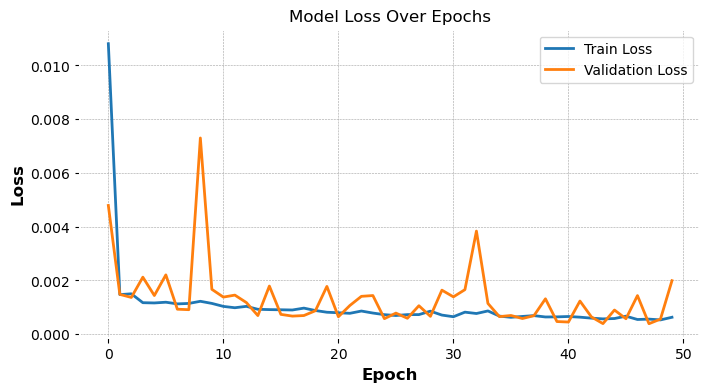

In [194]:
# 使用 grid_search 得到的最佳参数
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# 使用最佳参数构建最佳模型
best_model = build_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])

# 重新训练模型
history = best_model.fit(
    trainX, 
    trainY, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'], 
    validation_data=(testX, testY), 
    #callbacks=[early_stop],
    verbose=1
)

# 绘制损失图
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [195]:
#检查模型的最佳参数
grid_search.best_params_

{'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 50, 'optimizer': 'Adam'}

In [196]:
my_model=grid_search.best_estimator_.model

In [197]:
my_model

In [198]:
prediction=my_model.predict(testX)

15/15 [==============================] - 1s 9ms/step


In [199]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.7806332 ]
 [0.7829922 ]
 [0.78551084]
 [0.7856103 ]
 [0.78111047]
 [0.77161306]
 [0.7605382 ]
 [0.75076133]
 [0.739875  ]
 [0.7299271 ]
 [0.7235181 ]
 [0.71953344]
 [0.71836644]
 [0.7207761 ]
 [0.72538644]
 [0.72935194]
 [0.7323413 ]
 [0.7333817 ]
 [0.734136  ]
 [0.7358478 ]
 [0.7392606 ]
 [0.74467826]
 [0.7512453 ]
 [0.7570886 ]
 [0.7627598 ]
 [0.7668153 ]
 [0.771004  ]
 [0.7764697 ]
 [0.78126574]
 [0.7859433 ]
 [0.7915982 ]
 [0.79834515]
 [0.80504024]
 [0.8104195 ]
 [0.8137824 ]
 [0.8178012 ]
 [0.82237023]
 [0.8296915 ]
 [0.83743054]
 [0.8439931 ]
 [0.85156304]
 [0.8596253 ]
 [0.8664693 ]
 [0.87271845]
 [0.8774043 ]
 [0.8830756 ]
 [0.88890797]
 [0.8952989 ]
 [0.9020781 ]
 [0.90850496]
 [0.9149387 ]
 [0.92055213]
 [0.9242343 ]
 [0.9244876 ]
 [0.9226335 ]
 [0.91978765]
 [0.9178274 ]
 [0.9146685 ]
 [0.9084228 ]
 [0.90071225]
 [0.8920548 ]
 [0.8829864 ]
 [0.874678  ]
 [0.86627024]
 [0.85880977]
 [0.8520147 ]
 [0.84739393]
 [0.8473735 ]
 [0.8461757 ]
 [0.84429145]
 [0.8411

In [200]:
prediction.shape
#testY 和 prediction 的长度是一样的。 现在可以将 testY 与预测进行比较。

(453, 1)

In [201]:

prediction_copies_array = np.repeat(prediction,5, axis=-1)

In [202]:

prediction_copies_array.shape


(453, 5)

In [203]:

prediction_copies_array

array([[0.7806332 , 0.7806332 , 0.7806332 , 0.7806332 , 0.7806332 ],
       [0.7829922 , 0.7829922 , 0.7829922 , 0.7829922 , 0.7829922 ],
       [0.78551084, 0.78551084, 0.78551084, 0.78551084, 0.78551084],
       ...,
       [0.93790966, 0.93790966, 0.93790966, 0.93790966, 0.93790966],
       [0.93780816, 0.93780816, 0.93780816, 0.93780816, 0.93780816],
       [0.93631685, 0.93631685, 0.93631685, 0.93631685, 0.93631685]],
      dtype=float32)

In [204]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),5)))[:,0]
# 逆变换后的第一列是我们需要的，所以我们在最后使用了 → [:,0]

In [205]:
pred.shape

(453,)

In [206]:
#testY 也是按比例缩放的，也需要使用与上述相同的代码进行逆变换。
original_copies_array = np.repeat(testY,5, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),5)))[:,0]

In [207]:
pred

array([146.62573, 147.0129 , 147.42628, 147.44261, 146.70406, 145.14526,
       143.32758, 141.7229 , 139.93616, 138.30342, 137.25153, 136.59753,
       136.40599, 136.80148, 137.55817, 138.20903, 138.69966, 138.87042,
       138.99422, 139.27518, 139.83531, 140.7245 , 141.80234, 142.7614 ,
       143.6922 , 144.35782, 145.0453 , 145.94238, 146.72954, 147.49727,
       148.42538, 149.53276, 150.6316 , 151.5145 , 152.06644, 152.72604,
       153.47595, 154.67758, 155.94777, 157.02487, 158.26732, 159.59056,
       160.71385, 161.73952, 162.50859, 163.4394 , 164.39667, 165.44559,
       166.55824, 167.61308, 168.66905, 169.59038, 170.19472, 170.23628,
       169.93199, 169.46489, 169.14316, 168.6247 , 167.59961, 166.33409,
       164.91315, 163.42477, 162.06113, 160.68118, 159.45671, 158.34145,
       157.58304, 157.5797 , 157.38309, 157.07384, 156.55556, 155.73386,
       155.05765, 154.79823, 154.7118 , 154.47278, 153.99223, 153.51985,
       153.1842 , 152.60449, 151.52484, 149.95654, 

In [208]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [146.62573 147.0129  147.42628 147.44261 146.70406 145.14526 143.32758
 141.7229  139.93616 138.30342 137.25153 136.59753 136.40599 136.80148
 137.55817 138.20903 138.69966 138.87042 138.99422 139.27518 139.83531
 140.7245  141.80234 142.7614  143.6922  144.35782 145.0453  145.94238
 146.72954 147.49727 148.42538 149.53276 150.6316  151.5145  152.06644
 152.72604 153.47595 154.67758 155.94777 157.02487 158.26732 159.59056
 160.71385 161.73952 162.50859 163.4394  164.39667 165.44559 166.55824
 167.61308 168.66905 169.59038 170.19472 170.23628 169.93199 169.46489
 169.14316 168.6247  167.59961 166.33409 164.91315 163.42477 162.06113
 160.68118 159.45671 158.34145 157.58304 157.5797  157.38309 157.07384
 156.55556 155.73386 155.05765 154.79823 154.7118  154.47278 153.99223
 153.51985 153.1842  152.60449 151.52484 149.95654 148.39908 147.3954
 146.73045 146.34596 145.68787 144.92992 144.1141  143.28558 142.64435
 142.20602 142.01251 142.17139 142.4208  142.75877 143.297   14

In [209]:

import matplotlib.pyplot as plt

In [210]:
data_to_save = pd.DataFrame({
    'Original_Stock_Price': original,
    'LSTM_Predicted_Stock_Price': pred
})

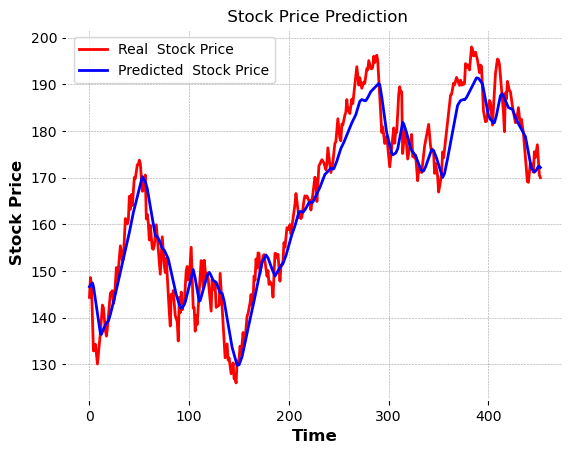

In [211]:
plt.plot(original, color = 'red', label = 'Real  Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()